In [24]:
import pandas as pd
import glob

# Specify the directory containing your .pkl files
file_path = 'C:\\Users\\sudar\\OneDrive\\Desktop\\SUPER FOLDER\\unified mentor internship\\fraud_detection\\fraud_detection\\dataset\\data\\*.pkl'
all_files = glob.glob(file_path)

# Load all .pkl files into a list of DataFrames
df_list = []
for file in all_files:
    try:
        df = pd.read_pickle(file)
        df_list.append(df)
        print(f"Loaded {file} successfully.")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Concatenate DataFrames into one DataFrame
if not df_list:
    raise ValueError("No .pkl files were loaded. Please check your file path and contents.")

data = pd.concat(df_list, ignore_index=True)
print(data.head())


Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-01.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-02.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-03.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-04.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-05.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_detection\fraud_detection\dataset\data\2018-04-06.pkl successfully.
Loaded C:\Users\sudar\OneDrive\Desktop\SUPER FOLDER\unified mentor internship\fraud_dete

In [25]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as needed
data.fillna(0, inplace=True)

# Convert TX_DATETIME to datetime type
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'])

# Display the structure of the DataFrame
print(data.info())


TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB
None


In [26]:
# Create features based on transaction amount thresholds
data['HIGH_AMOUNT'] = (data['TX_AMOUNT'] > 220).astype(int)

# Extract time-based features
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour
data['TX_DAY'] = data['TX_DATETIME'].dt.dayofweek  # 0=Monday, 6=Sunday

# Create terminal and customer frequency counts for potential fraud detection
terminal_counts = data['TERMINAL_ID'].value_counts()
customer_counts = data['CUSTOMER_ID'].value_counts()

data['TERMINAL_FREQUENCY'] = data['TERMINAL_ID'].map(terminal_counts)
data['CUSTOMER_FREQUENCY'] = data['CUSTOMER_ID'].map(customer_counts)

print(data[['TX_AMOUNT', 'HIGH_AMOUNT', 'TX_HOUR', 'TX_DAY', 'TERMINAL_FREQUENCY', 'CUSTOMER_FREQUENCY']].head())


   TX_AMOUNT  HIGH_AMOUNT  TX_HOUR  TX_DAY  TERMINAL_FREQUENCY  \
0      57.16            0        0       6                 146   
1      81.51            0        0       6                 161   
2     146.00            0        0       6                 235   
3      64.49            0        0       6                 238   
4      50.99            0        0       6                 137   

   CUSTOMER_FREQUENCY  
0                 686  
1                 738  
2                 338  
3                 599  
4                 494  


In [27]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(['TRANSACTION_ID', 'TX_FRAUD', 'TX_DATETIME'], axis=1)  # Drop non-feature columns
y = data['TX_FRAUD']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    347970
           1       1.00      1.00      1.00      2861

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831



In [29]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Accuracy: 1.00


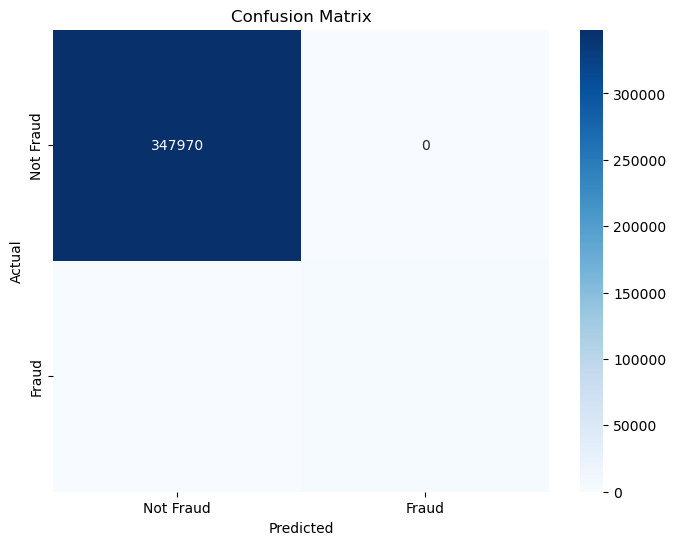

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    347970
           1       1.00      1.00      1.00      2861

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831



In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


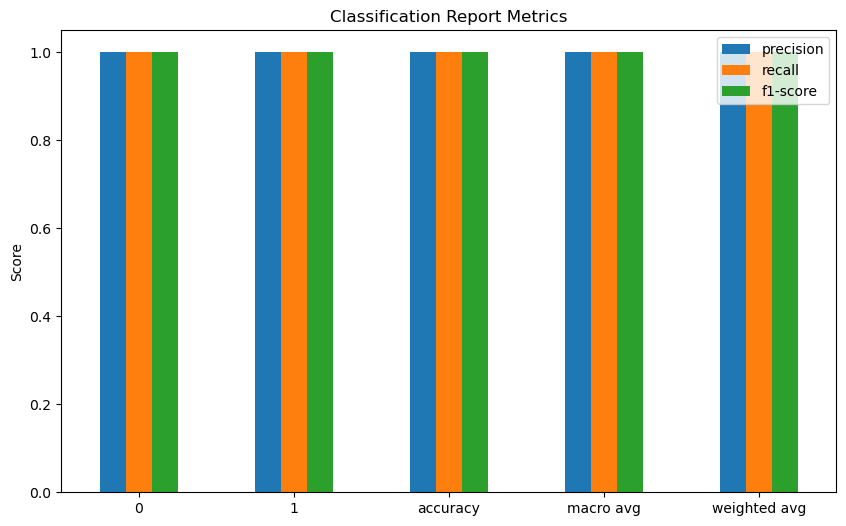

In [33]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


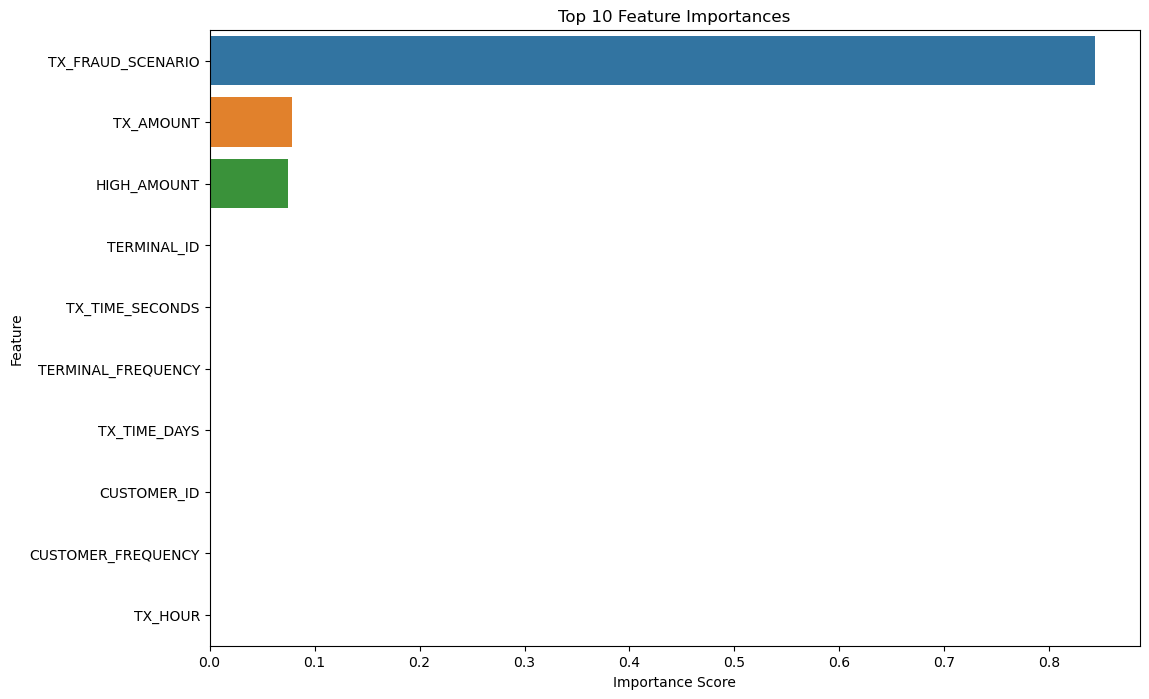

In [34]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
